# LIBRARIES IMPORT

In [2]:
# imports

import fig_lib 
import CNN_lib
import CNN_utilities
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# DATA LOAD

In [3]:
data_load_dicom=True

if data_load_dicom:

    patients_recs_d_df=CNN_utilities.main_d_df()
    patients_labels_d_df=CNN_utilities.labels_df()
    patients_d_df=pd.merge( patients_labels_d_df,patients_recs_d_df, on='PatientID')
    patients_d_df


In [7]:
if data_load_dicom:

    input_d={}    
    for label,ii in zip(patients_d_df['label'],patients_d_df['Records']):
        
        for rec in ii:
            input_d[rec]={'label':label,'image':[]}
        
input_d

{'I0': {'label': 0, 'image': []},
 'I1': {'label': 0, 'image': []},
 'I2': {'label': 0, 'image': []},
 'I9': {'label': 0, 'image': []},
 'I11': {'label': 0, 'image': []},
 'I18': {'label': 0, 'image': []},
 'I24': {'label': 0, 'image': []},
 'I25': {'label': 0, 'image': []},
 'I26': {'label': 0, 'image': []},
 'I27': {'label': 0, 'image': []},
 'I28': {'label': 0, 'image': []},
 'I33': {'label': 0, 'image': []},
 'I38': {'label': 0, 'image': []},
 'I39': {'label': 0, 'image': []},
 'I40': {'label': 0, 'image': []},
 'I42': {'label': 0, 'image': []},
 'I44': {'label': 0, 'image': []},
 'I45': {'label': 0, 'image': []},
 'I47': {'label': 0, 'image': []},
 'I49': {'label': 0, 'image': []},
 'I50': {'label': 0, 'image': []},
 'I51': {'label': 0, 'image': []},
 'I53': {'label': 0, 'image': []},
 'I54': {'label': 0, 'image': []},
 'I56': {'label': 0, 'image': []},
 'I57': {'label': 0, 'image': []},
 'I58': {'label': 0, 'image': []},
 'I61': {'label': 0, 'image': []},
 'I63': {'label': 0, 'im

# DATA GENERATOR

In [17]:
# -------- DATA PARAMS --------

generate_new_data=True                    

if generate_new_data:    

    video_d=True                                    # Video = True , Image = False 
    total_n_recs=400
    #n_recs_train,n_recs_eval=300,80
    HEIGHT, WIDTH = 100, 100
    circles_filled=False
    color=255

    # -------- Video ---------
 

    n_frames=[10,12]    # [min,max]

    t_btw_frm=0.2

In [18]:
#input_d, eval_d

if generate_new_data:

    if video_d:
        
        input_d=fig_lib.vid_data_gen(HEIGHT, WIDTH,total_n_recs,n_frames,'I',cir_f=circles_filled,color=color)
        
    else:

        input_d=fig_lib.im_data_gen(HEIGHT, WIDTH,total_n_recs,'I',cir_f=circles_filled,color=color)

else:pass


print('FIRST LAYER KEYS:', list(input_d.keys()))
print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))


FIRST LAYER KEYS: ['I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'I77', 'I78', 'I79', 'I80', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'I87', 'I88', 'I89', 'I90', 'I91', 'I92', 'I93', 'I94', 'I95', 'I96', 'I97', 'I98', 'I99', 'I100', 'I101', 'I102', 'I103', 'I104', 'I105', 'I106', 'I107', 'I108', 'I109', 'I110', 'I111', 'I112', 'I113', 'I114', 'I115', 'I116', 'I117', 'I118', 'I119', 'I120', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'I127', 'I128', 'I129', 'I130', 'I131', 'I132', 'I133', 'I134', 'I135', 'I1

In [19]:
print('RECORD - LABEL - SHAPE')

if generate_new_data:
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 circle (11, 100, 100) <class 'numpy.ndarray'>
I1 circle (12, 100, 100) <class 'numpy.ndarray'>
I2 circle (10, 100, 100) <class 'numpy.ndarray'>
I3 circle (11, 100, 100) <class 'numpy.ndarray'>
I4 circle (10, 100, 100) <class 'numpy.ndarray'>
I5 circle (10, 100, 100) <class 'numpy.ndarray'>
I6 circle (10, 100, 100) <class 'numpy.ndarray'>
I7 circle (10, 100, 100) <class 'numpy.ndarray'>
I8 line (12, 100, 100) <class 'numpy.ndarray'>
I9 circle (10, 100, 100) <class 'numpy.ndarray'>
I10 line (12, 100, 100) <class 'numpy.ndarray'>
I11 circle (11, 100, 100) <class 'numpy.ndarray'>
I12 line (12, 100, 100) <class 'numpy.ndarray'>
I13 line (10, 100, 100) <class 'numpy.ndarray'>
I14 circle (11, 100, 100) <class 'numpy.ndarray'>
I15 circle (10, 100, 100) <class 'numpy.ndarray'>
I16 line (11, 100, 100) <class 'numpy.ndarray'>
I17 line (11, 100, 100) <class 'numpy.ndarray'>
I18 circle (12, 100, 100) <class 'numpy.ndarray'>
I19 line (10, 100, 100) <class 'numpy.ndarray'>
I

In [20]:
d_plt_check,rec_check=True,'I1'
print(input_d[rec_check]['label'])


circle


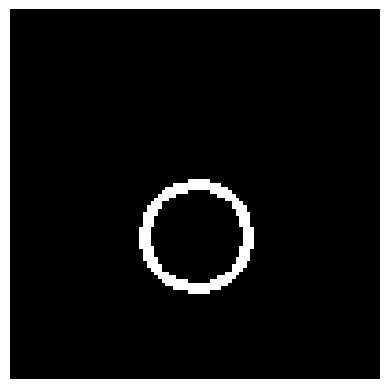

In [21]:
# check video

if generate_new_data:

    if d_plt_check:

        if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)
        else:fig_lib.im_show(input_d[rec_check]['image'])



# CNN

### GENERATE TRAIN DATA

In [25]:
# X_train,Y_train,X_eval,Y_eval

test_size=0.2

if video_d:
    
    X_train,Y_train,max_frm_n =CNN_lib.vid_d_bin_gen(input_d,HEIGHT, WIDTH, zero='circle', one= 'line')
    
else:

    X_train,Y_train =CNN_lib.im_d_bin_gen(input_d,zero='circle', one= 'line')
    
X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=test_size) #,random_state=42)

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 320 Evaluation data: 80


 Train data shape: (320, 12, 100, 100, 1)  Validation data shape: (80, 12, 100, 100, 1)


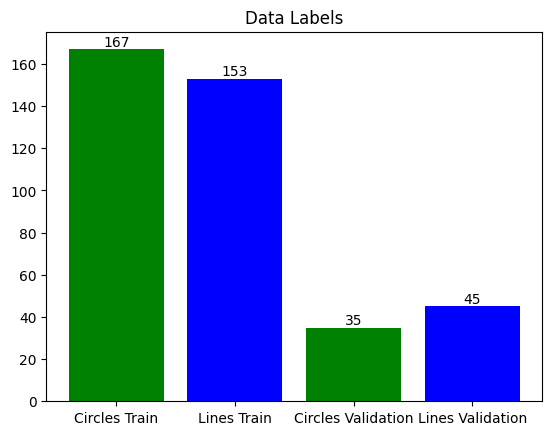

In [26]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)
zeros_count_val = np.sum(Y_eval == 0)
ones_count_val = np.sum(Y_eval == 1)

labels = ['Circles Train', 'Lines Train','Circles Validation', 'Lines Validation']
print(' Train data shape:', np.shape(X_train),' Validation data shape:', np.shape(X_eval))

plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['green', 'blue','green', 'blue'])

for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Data Labels')
plt.show()

### PARAMETERS

In [ ]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

In [ ]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'video_conv2D'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=2


### MODEL

In [ ]:
# MODEL 

if model_from_CNN_lib:
  
  if video_d: model = CNN_lib.lib_models(mdl,im_input_shp=(max_frm_n, HEIGHT, WIDTH, 1))
  else: model = CNN_lib.lib_models(mdl,im_input_shp=(HEIGHT, WIDTH,1))

else:

  model = models.Sequential([
          layers.Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',input_shape=(max_frm_n, HEIGHT, WIDTH, 1)),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=64, kernel_size=(1, 3, 3),  activation='relu'),
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(1,activation='sigmoid')
          ])


model.summary()

In [ ]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

### TRAINNING

In [ ]:
t_in=time.time()
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval))
t_train=time.time()-t_in

### EVALUATE MODEL

In [ ]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

In [ ]:
performance_d={'NAME':mdl,
               'ACCURACY':test_accuracy,
               'LOSS':test_loss,
               'VIDEO':video_d,
               'TRAIN SAMPLES':n_recs_train,
               'VALIDATION SAMPLES':n_recs_eval,
               'TRAINNING TIME':t_train,
               'EPOCHS':epch,
               'FRAMES RANGE':n_frames,
               'HEIGHT':HEIGHT,
               'WIDTH':WIDTH}

performance_d

### FORECAST

GENERATE RANDOM IMAGE

In [ ]:
# generate random im

n_rdm=np.random.rand()

if video_d:
    
    vd_ls=[]
    N_frames=np.random.randint(n_frames[0],n_frames[1]+1)

    if n_rdm>=0.5:

        p1=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        p2=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]

        for _ in range(N_frames):

            vd_ls.append(fig_lib.line_im(p1,p2,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color))
            p1[0]+= np.random.randint(-int(WIDTH*0.02), int(WIDTH*0.02))
            p2[0]+=np.random.randint(-int(WIDTH*0.06), int(WIDTH*0.06))
            p1[1]+= np.random.randint(-int(HEIGHT*0.02), int(HEIGHT*0.02))
            p2[1]+=np.random.randint(-int(HEIGHT*0.06), int(HEIGHT*0.06))

        label='Line'
        

    else:

        center= [np.random.randint(int(0+WIDTH*0.3), int(WIDTH - WIDTH*0.3)),np.random.randint(int(0+HEIGHT*0.3), int(HEIGHT-HEIGHT*0.3))]
        radio = np.random.randint(12, 17)

        for _ in range(N_frames):
        
            vd_ls.append(fig_lib.circle_im(center,radio,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color,filled=circles_filled))
            center[0]+= np.random.randint(-int(WIDTH*0.03), int(WIDTH*0.03))
            center[1]+= np.random.randint(-int(HEIGHT*0.03), int(HEIGHT*0.03))
            radio += np.random.randint(-int(HEIGHT*0.01), int(HEIGHT*0.02))

        label ='circle'

    video=np.array(vd_ls)
    image = video[:, :, :, np.newaxis]
    frames_actual = image.shape[0]
    if frames_actual < max_frm_n:
        
        padding = np.zeros((max_frm_n - frames_actual, HEIGHT, WIDTH, 1))
        image = np.concatenate([image, padding], axis=0)

else:

    if n_rdm>=0.5:

        p1=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        p2=[np.random.randint(0, WIDTH-1),np.random.randint(0, HEIGHT-1)]
        image=fig_lib.line_im(p1,p2,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color)
        label='Line'

    else:
        
        center= [np.random.randint(int(0+WIDTH*0.3), int(WIDTH - WIDTH*0.3)),np.random.randint(int(0+HEIGHT*0.3), int(HEIGHT-HEIGHT*0.3))]
        radio = np.random.randint(12, 17)
        image=fig_lib.circle_im(center,radio,height=HEIGHT, width=WIDTH,thickness=(1,3),color=color,filled=circles_filled)
        label= 'circle'

In [ ]:
# Forecast

pred = model.predict(np.expand_dims(image, axis=0),verbose=2)
CNN_lib.bin_forecast(pred,label=label,up_frc='line',down_frc='circle')


In [ ]:
# show

if video_d:fig_lib.vid_show(video)
else:fig_lib.im_show(image)